## NLP Project - Sentiment Analysis using Vader

##### By Luíza Sabchuk

### Introduction

<p>In this project, I will use the Vader Library (Valence Aware Dictionary and sEntiment Reasoner) to analyze the dialogues of the Star Wars episodes Attack of The Clones (episode II), Revenge of the Sith (episode III), A New Hope (episode IV), The Empire Strikes Back (episode V) and Return of the Jedi (episode VI) in relation to the feelings that the dialogues show. The goal is to use sentiment analysis techniques to determine which Star Wars episode is the "darkest", based on the dialogues. I'll also look at sentiment specifically in Darth Vader/Anakin Skywalker dialogue, to gauge changes in the character's attitude. The database source is in the README.md file.</p>

<p>Sentiment analysis is a NLP practice that aims to classify the sentiments of a text by dividing them, for example, into Positive, Negative or Neutral (which may have more or less categories, depending on the analysis you want to demonstrate). One of the advantages of VADER is the possibility to evaluate the sentiment of any text without the need for previous training of the model, as in classic Machine Learning models.</p>

<p>But what is the point of analyzing texts for the context of Data Science? With the more frequent presence of social media in all aspects of people's lives, sentiment analysis in texts becomes useful to measure the acceptance (or not) of a new product, a new brand, a new movie or series, a new video game by the end consumer. These analyzes can guide marketing campaigns, helps to identify and fix problems in products, services, technologies based on consumers opinions, just to name a few examples.</p>

<p>The result generated by VADER is a dictionary of 4 keys <strong>(neg - negative, neu - neutral, pos - positive and compound)</strong>. The sum of the three first keys must equal 1 or close. On the other hand, the compound score is the calculation of the sum of the valence scores of each word in the lexicon. Its value is between -1 (most extreme negative sentiment) and +1 (most extreme positive sentiment). The compound score can be enough to determine the underlying sentiment of a text. The values of the compound are:
<li>positive sentiment, ≥ 0.05</li>
<li>negative sentiment, ≤ -0.05</li>
<li>neutral sentiment, between ]-0.05, 0.05[</li></p>

<p>First, we start by importing the libraries needed for the analysis: Pandas and Numpy libraries, for basic numerical analysis and dataframe reading, Matplotlib and Seaborn for some graphics, and the VADER library for compound metric measurement.</p>

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

<p>Now that the environment is ready, we can load the movie scripts in dataframe format from Pandas.</p>

In [52]:
# to read all the episodes as a Pandas Dataframe and cleaning the lines that don't have pure text
episodeII = pd.read_csv ("/Users/sabchukibm/star_wars_data/EpisodeII_dialogues_clean.tsv",sep="\t", header=None, names=['character', 'speech'])
episodeIII = pd.read_csv('/Users/sabchukibm/star_wars_data/EpisodeIII_dialogues_clean.tsv', sep='\t', encoding = 'ISO-8859-1', header=None, names=['character', 'speech'])
episodeIV = pd.read_csv ("/Users/sabchukibm/star_wars_data/EpisodeIV_dialogues_clean.tsv",sep="\t", header=None, names=['character', 'speech'])
episodeV = pd.read_csv ("/Users/sabchukibm/star_wars_data/EpisodeV_dialogues_clean.tsv",sep="\t", header=None, names=['character', 'speech'])
episodeVI = pd.read_csv ("/Users/sabchukibm/star_wars_data/EpisodeVI_dialogues_clean.tsv",sep="\t", header=None, names=['character', 'speech']) 
#---------------------------------------------------------------
episodeII = episodeII.loc[~(episodeII['character']=='===') | ~(episodeII['speech']=='===')]
episodeIII = episodeIII.loc[~(episodeIII['character']=='===') | ~(episodeIII['speech']=='===')]
episodeIV = episodeIV.loc[~(episodeIV['character']=='===') | ~(episodeIV['speech']=='===')]
episodeV = episodeV.loc[~(episodeV['character']=='===') | ~(episodeV['speech']=='===')]
episodeVI = episodeVI.loc[~(episodeVI['character']=='===') | ~(episodeVI['speech']=='===')]

<p>Let's see what is the values of the rows (the name of the characters in the movies), to see if there's some need to treat this column:</p>

In [53]:
print ('Episode II Characters')
display (episodeII.character.unique())

print ('Episode III Characters')
display (episodeIII.character.unique())

print ('Episode IV Characters')
display (episodeIV.character.unique())

print ('Episode V Characters')
display (episodeV.character.unique())

print ('Episode VI Characters')
display (episodeVI.character.unique())


Episode II Characters


array(['PADME', 'CORDE', 'AMIDALA', 'CAPTAIN TYPHO', 'MAS AMEDDA',
       'DARTH SIDIOUS', 'SENATOR ASK AAK', 'AMBASSADOR DARSANA',
       'ORN FREE TAA', 'MACE WINDU', 'YODA', 'DAR WAC', 'KI-ADI-MUNDI',
       'BAIL ORGANA', 'JAR JAR', 'OBI-WAN', 'ANAKIN',
       'ELAN SLEAZEBAGGANO', 'ELAN', 'ZAM WESSEL', 'ZAM', 'DORME', 'PK-4',
       'SERVER', 'FOOD SERVER', 'HERMIONE', 'HERMIONE BAGWA',
       'DEXTER JETTSTER', 'QUEEN JAMILLIA', 'SIO BIBBLE', 'JOCASTA NU',
       'RYOO & POOJA', 'SOLA', 'JOBAL', 'RUWEE', 'JOVAL', 'CHILDREN',
       'JEDI CHILD JACK', 'JEDI CHILD MAY', 'MACE', 'MACE-WINDU',
       'TAUN WE', 'LAMA SU', 'OBI-WAM', 'WINDU', 'PAMDE', 'BOBA FETT',
       'JANGO FETT', 'JANGO', 'BOBA', 'WATTO', 'C-3PO', 'OWEN', 'BERU',
       'CLIEGG', 'SHMI', 'COUNT DOOKU', 'DOOKU', 'SUN RIT', 'POGGLE',
       'NUTE GUNRAY', 'PLO KOON', 'DROID CAPTAIN', 'CLONE CAPTAIN'],
      dtype=object)

Episode III Characters


array(['ANAKIN', 'OBI-WAN', 'ODD BALL', 'CLONE PILOT 2',
       'GENERAL GRIEVOUS', 'CAPTAIN', 'BODYGUARD I',
       'SUPER BATTLE DROID R77', 'BATTLE DROID', 'SUPER BATTLE DROID 1',
       'SUPER BATTLE DROID 2', 'DROID 1', 'DROID 2', 'DARTH SIDIOUS',
       'COUNT DOOKU', 'PILOT', 'ANAKINN', 'ANAKIN/', 'BODYGUARD',
       'SUPER BATTLE DROID', 'FIRESHIP PILOT', 'MACE WINDU',
       'BAIL ORGANA', 'C-3PO', 'PADME', 'SUPER BATTLE DROID G21', 'YODA',
       'FANG ZAR', 'MON MOTHMA', 'GIDDEAN DANU', 'TERR TANEEL', 'MACE',
       'KI-ADI-MUNDI', 'CAPTAIN TYPHO', 'MOTEE', 'CLONE COMMANDER GREE',
       'BANA BREEMU', 'CHI EEKWAY', 'CLONE COMMANDER CODY', 'JAR JAR',
       'TION MEDON', 'WRANGLER', 'NUTE GUNRAY', 'PALPATINE',
       'CLONE COMMANDER BACARA', 'AAYLA', 'BLY', 'CLONE PILOT',
       'PLO KOON', 'DABTH SIDIOUS', 'YOUNGLINGS', 'CLONE SERGEANT',
       'CLONE COMMANDER APPO', 'AT-ST CLONE SERGEANT', 'CLONE TROOPER',
       'ROYAL GUARD', 'CAPTAIN ANTILLES', 'CLONE CAPTAIN', 'BAIL'

Episode IV Characters


array(['C-3PO', 'LUKE', 'IMPERIAL OFFICER', 'ANAKIN', 'REBEL OFFICER',
       'TROOPER', 'CHIEF PILOT', 'CAPTAIN', 'WOMAN', 'FIXER', 'CAMIE',
       'BIGGS', 'DEAK', 'LEIA', 'COMMANDER', 'SECOND OFFICER',
       'FIRST TROOPER', 'SECOND TROOPER', 'BERU', 'OWEN', 'AUNT BERU',
       'OBI-WAN', 'TAGGE', 'MOTTI', 'TARKIN', 'BARTENDER', 'CREATURE',
       'HUMAN', 'HAN', 'GREEDO', 'JABBA', 'OFFICER CASS',
       'VOICE OVER DEATH STAR INTERCOM', 'OFFICER', 'VOICE',
       'GANTRY OFFICER', 'INTERCOM VOICE', 'TROOPER VOICE',
       'FIRST OFFICER', 'WILLARD', 'DEATH STAR INTERCOM VOICE', 'DODONNA',
       'GOLD LEADER', 'WEDGE', 'MAN', 'RED LEADER', 'CHIEF',
       'MASSASSI INTERCOM VOICE', 'RED TEN', 'RED SEVEN', 'PORKINS',
       'RED NINE', 'RED ELEVEN', 'ASTRO-OFFICER', 'CONTROL OFFICER',
       'GOLD FIVE', 'GOLD TWO', 'WINGMAN', 'BASE VOICE', 'TECHNICIAN'],
      dtype=object)

Episode V Characters


array(['LUKE', 'HAN', 'RIEEKAN', 'LEIA', 'C-3PO', 'DECK OFFICER',
       'ASSISTANT OFFICER', 'LIEUTENANT', 'DERLIN', 'OBI-WAN', 'ZEV',
       'ANNOUNCER', 'SENIOR CONTROLLER', 'PIETT', 'OZZEL', 'ANAKIN',
       'REBEL CAPTAIN', 'REBEL FIGHTER', 'MEDICAL DROID', 'CONTROLLER',
       'VEERS', 'HOBBIE', 'PILOTS', 'CAPTAIN', 'WOMAN CONTROLLER', 'DACK',
       'TRENCH OFFICER', 'WEDGE', 'JANSON', 'HEAD CONTROLLER', 'OFFICER',
       'SECOND OFFICER', 'PILOT', 'IMPERIAL OFFICER', 'STRANGE VOICE',
       'YODA', 'NEEDA', 'DARTH SIDIOUS', 'FIRST CONTROLLER',
       'SECOND CONTROLLER', 'BOBA FETT', 'TRACKING OFFICER',
       'COMMUNICATIONS OFFICER', 'INTERCOM VOICE', 'LANDO',
       'SECOND THREEPIO', 'MAN', 'IMPERIAL SOLDIER'], dtype=object)

Episode VI Characters


array(['SHUTTLE CAPTAIN', 'DEATH STAR CONTROLLER', 'OFFICER', 'OPERATOR',
       'JERJERROD', 'ANAKIN', 'C-3PO', 'STRANGE VOICE', 'BIB', 'JABBA',
       'LUKE', 'NINEDENINE', 'OOLA', 'BOUSHH', 'HAN', 'LEIA', 'LANDO',
       'DARTH SIDIOUS', 'YODA', 'OBI-WAN', 'MON MOTHMA', 'ACKBAR',
       'GENERAL MADINE', 'VOICE', 'CONTROLLER', 'PIETT', 'PILOT VOICE',
       'SCOUT', 'GUARD', 'COMMANDER', 'WEDGE', 'GRAY LEADER',
       'GREEN LEADER', 'RED LEADER', 'REBEL PILOT', 'STORMTROOPER',
       'BUNKER COMMANDER', 'RED TWO', 'RED THREE', 'NAVIGATOR',
       'Y-WING PILOT', 'WALKER PILOT', 'PILOT', 'HAN/',
       'CONTROL ROOM COMMANDER', 'SECOND COMMANDER', 'LURE'], dtype=object)

## Data Processing

<p>This step consists of processing the data for analysis. In this project, this step will be relatively short, as VADER is able to evaluate the sentiment of the sentences, including measuring the scores. Let's see the following example:


In [54]:
sentence_1 = "I am happy!"
sentence_2 = "I am happy!!!"
sentence_3 = "I am so happy!!!!"

print(analyzer.polarity_scores(sentence_1))
print(analyzer.polarity_scores(sentence_2))
print(analyzer.polarity_scores(sentence_3))

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6114}
{'neg': 0.0, 'neu': 0.304, 'pos': 0.696, 'compound': 0.6784}
{'neg': 0.0, 'neu': 0.337, 'pos': 0.663, 'compound': 0.7851}


<p>The sentences "I am happy!" and "I am happy!!!" have the same meaning, but the second sentence has two extra exclamation marks. Compound values in sentences demonstrate the impact that punctuation has on a written sentence, either positively, negatively or neutrally. In the third sentence, an extra word and an extra exclamation point made even more evident the sensitivity of VADER's algorithm in capturing the feeling behind the excess of exclamations. Written language relies on punctuation to show feelings.</p>

<p>Note that the "characters" column has names spelled incorrectly. Let's fix these names in all dataframes. In the Episodes IV, V and VI database, the name "Anakin" will be replaced by "Darth Vader", as Anakin Skywalker was already known as Darth Vader in both episodes of the trilogy, and in Episode III, his name will be replaced by "Anakin/Vader" (that's the episode when Anakin was corrupted by the Dark Force). This change will be important to analyze the specific dialogues of this character.</p>

In [55]:
episodeII['character'] = episodeII['character'].replace(['PAMDE', 'AMIDALA', 'OBI-WAM', 'MACE-WINDU', 'WINDU', 'MACE', 'JANGO', 'BOBA', 'HERMIONE', 'ZAM', 'DOOKU', 'SHMI'], ['PADME', 'PADME', 'OBI-WAN', 'MACE WINDU', 'MACE WINDU', 'MACE WINDU', 'JANGO FETT', 'BOBA FETT', 'HERMIONE BAGWA', 'ZAM WESSEL', 'COUNT DOOKU', 'SHMI SKYWALKER'])

episodeIII['character'] = episodeIII['character'].replace(['ANAKIN', 'ANAKINN', 'ANAKIN/', 'MACE', 'G-3PO', 'DABTH SIDIOUS', 'DARTH VADER', 'PALPATINE'], ['ANAKIN/VADER', 'ANAKIN/VADER', 'ANAKIN/VADER', 'MACE WINDU', 'C-3PO', 'DARTH SIDIOUS', 'ANAKIN/VADER', 'DARTH SIDIOUS'])

episodeIV['character'] = episodeIV['character'].replace(['OWEN', 'AUNT BERU', 'ANAKIN', 'HAN'], ['OWEN LARS', 'BERU', 'DARTH VADER', 'HAN SOLO'])

episodeV['character'] = episodeV['character'].replace(['ANAKIN', 'HAN'], ['DARTH VADER', 'HAN SOLO'])

episodeVI['character'] = episodeVI['character'].replace(['HAN/', 'LURE', 'ANAKIN', 'HAN'], ['HAN SOLO','LUKE', 'DARTH VADER', 'HAN SOLO'])

In [56]:
#Just to test the last script!

#display (episodeII.character.unique())

<p>Here is some basic information about the movie scripts:</p>

In [57]:
print ('Informations Episode II')
episodeII.info()
print ('...................................')
print ('Informations Episode III')
episodeIII.info()
print ('...................................')
print ('Informations Episode IV')
episodeIV.info()
print ('...................................')
print ('Informations Episode V')
episodeV.info()
print ('...................................')
print ('Informations Episode VI')
episodeVI.info()


Informations Episode II
<class 'pandas.core.frame.DataFrame'>
Int64Index: 824 entries, 0 to 908
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   character  824 non-null    object
 1   speech     824 non-null    object
dtypes: object(2)
memory usage: 19.3+ KB
...................................
Informations Episode III
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 1224
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   character  1078 non-null   object
 1   speech     1078 non-null   object
dtypes: object(2)
memory usage: 25.3+ KB
...................................
Informations Episode IV
<class 'pandas.core.frame.DataFrame'>
Int64Index: 901 entries, 0 to 1157
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   character  901 non-null    object
 1   speech     901 non-null 

<p>To read each row of dataframes, the Pandas library has several techniques. The next block of code contains the technique that will be used in this analysis: the application of Pandas' .apply() and lambda functions, and VADER's analyzer.polarity_scores function (a function that calculates the compound for each sentence).</p>

In [58]:
episodeII['compound'] = episodeII.apply(lambda x : analyzer.polarity_scores(x['speech'])['compound'], axis=1)
episodeIII['compound'] = episodeIII.apply(lambda x : analyzer.polarity_scores(x['speech'])['compound'], axis=1)
episodeIV['compound'] = episodeIV.apply(lambda x : analyzer.polarity_scores(x['speech'])['compound'], axis=1)
episodeV['compound'] = episodeV.apply(lambda x : analyzer.polarity_scores(x['speech'])['compound'], axis=1)
episodeVI['compound'] = episodeVI.apply(lambda x : analyzer.polarity_scores(x['speech'])['compound'], axis=1)
#------------------------------------------------------------------------------------------------------------
print ('Attack of The Clones Dialogues')
display (episodeII.head())
print ('.................................................')
print ('Revenge of the Sith dialogues')
display (episodeIII.head())
print ('.................................................')
print ('A New Hope dialogues')
display (episodeIV.head())
print ('.................................................')
print ('The Empire Strikes Back dialogues')
display (episodeV.head())
print ('..................................................')
print ('Return of the Jedi dialogues')
display (episodeVI.head())



Attack of The Clones Dialogues


,character,speech,compound
0,PADME,Corde...,0.0000
1,CORDE,"... I'm sorry, m'lady... I'm... not sure I...",-0.3098
2,PADME,No!... No!... No!... I should not have come back.,0.0000
3,CAPTAIN TYPHO,"M'Lady, you are still in danger. This vote is ...",-0.5516
5,MAS AMEDDA,Order! We shall have order! The motion for the...,0.0000


.................................................
Revenge of the Sith dialogues


,character,speech,compound
0,ANAKIN/VADER,"There isn't a droid made that can out fly you,...",-0.2960
1,OBI-WAN,"Look out, four droids inbound . . .",0.0000
3,OBI-WAN,We've got to split them up.,0.0000
4,ANAKIN/VADER,"Break left, fly through the guns on that tower.",0.0000
5,OBI-WAN,Easy for you to say . . . why am I always the ...,0.4404


.................................................
A New Hope dialogues


,character,speech,compound
0,C-3PO,Did you hear that? They've shut down the main...,-0.8876
2,C-3PO,I should have known better than to trust the l...,0.7351
4,LUKE,Hurry up! Come with me! What are you waiting...,0.0000
6,C-3PO,"Artoo! Artoo-Detoo, where are you? At last! W...",0.0000
8,IMPERIAL OFFICER,The Death Star plans are not in the main compu...,-0.5994


.................................................
The Empire Strikes Back dialogues


,character,speech,compound
0,LUKE,"Echo Three to Echo Seven. Han, old buddy, do y...",0.0000
1,HAN SOLO,"Loud and clear, kid. What's up?",0.3818
2,LUKE,"Well, I finished my circle. I don't pick up an...",0.2732
3,HAN SOLO,There isn't enough life on this ice cube to fi...,0.0000
4,LUKE,Right. I'll see you shortly. There's a meteori...,0.2621


..................................................
Return of the Jedi dialogues


,character,speech,compound
0,SHUTTLE CAPTAIN,"Command station, this is ST 321. Code Clearanc...",0.3400
1,DEATH STAR CONTROLLER,The security deflector shield will be deactiva...,0.6124
2,SHUTTLE CAPTAIN,We're starting our approach.,0.0000
4,OFFICER,Inform the commander that Lord Vader's shuttle...,0.0000
5,OPERATOR,"Yes, sir.",0.4019


<p>Let's understand what each of the functions used in the code block means.</p>
<p>The "analyzer.polarity_scores" function is a VADER native function that calculates the four sentiment parameters of the sentence. We apply it to all phrases, but we request that it return only the compound value, as it will be the analysis parameter.</p>
<p>The lambda function is a function that the user does not need to define. It's not necessary to write the whole function and then use it inside the code. It can be applied inside another function just by passing the input value (x) and defining the output (the compound value of the polarity scores function).</p>
<p>Finally, the apply() function returns a value after reading each row/column from a data table. In the case presented, the function read the lines (axis = 1) of the dataframe and returned a new column with the compound value.</p>

## Data Visualization and Analysis

<p>In this step we will visualize the data, at the same time that we analyze them. Remembering that the objectives of this analysis is to verify which episode among those analyzed is the most "dark" of the trilogy, and to analyze the evolution of the character Anakin Skywalker / Darth Vader throughout the episodes.<p>
<p>For start, we will check the mode values of the compound for each of the episodes. Mode is a metric to verify which value is more frequent in a data set, and will help define the best strategy to analyze which episode is the most "negative".</p>

In [59]:
print('Episode II Mode')
display(episodeII.mode(numeric_only=True))
print('Episode III Mode')
display(episodeIII.mode(numeric_only=True))
print('Episode IV Mode')
display(episodeIV.mode(numeric_only=True))
print('Episode V Mode')
display(episodeV.mode(numeric_only=True))
print('Episode VI Mode')
display(episodeVI.mode(numeric_only=True))

Episode II Mode


,compound
0,0.0


Episode III Mode


,compound
0,0.0


Episode IV Mode


,compound
0,0.0


Episode V Mode


,compound
0,0.0


Episode VI Mode


,compound
0,0.0


<p>All values were zero! What does that mean?</p>
<p>The mode is the most frequent value in a data set. This means that VADER classified most of the characters' lines as neutral. Let's create a second dataframe of each of the episodes, removing the values of neutral compounds (values between -0.05 and 0.05)</p>

In [60]:
#excluding neutral compound values
#print ('Attack of The Clones - No Neutral Compound')
epII = episodeII[ (episodeII['compound'] <= -0.05)
                | (episodeII['compound'] >= 0.05)]
#display (epII)

#print ('Revenge of The Sith - No Neutral Compound')
epIII = episodeIII[ (episodeIII['compound'] <= -0.05)
               | (episodeIII['compound'] >= 0.05)]
#display (epIII)

#print ('A New Hope - No Neutral Compound')
epIV = episodeIV[ (episodeIV['compound'] <= -0.05)
                | (episodeIV['compound'] >= 0.05)]
#display (epIV)

#print ('The Empire Strikes Back - No Neutral Compound')
epV = episodeV[ (episodeV['compound'] <= -0.05)
                | (episodeV['compound'] >= 0.05)]
#display (epV)

#print ('Return of The Jedi - No Neutral Compound')
epVI = episodeVI[ (episodeVI['compound'] <= -0.05)
                | (episodeVI['compound'] >= 0.05)]
#display (epVI)

In [61]:
#script_numII=pd.DataFrame(epII.character.value_counts()).iloc[:20]
#script_numIII=pd.DataFrame(epIII.character.value_counts()).iloc[:20]
#script_numIV=pd.DataFrame(epIV.character.value_counts()).iloc[:20]
#script_numV=pd.DataFrame(epV.character.value_counts()).iloc[:20]
#script_numVI=pd.DataFrame(epVI.character.value_counts()).iloc[:20]

#print('Number of dialogues - Attack of The Clones')
#display(script_numII)
#print('Number of dialogues - Revenge of The Sith')
#display(script_numIII)
#print('Number of dialogues - A New Hope')
#display(script_numIV)
#print('Number of dialogues - The Empire Strikes Back')
#display(script_numV)
#print('Number of dialogues - Return of The Jedi')
#display(script_numVI)

<p>Computing the mode without the neutral compound values:</p>

In [62]:
print('Episode II Mode')
display(epII.mode(numeric_only=True))
print('Episode III Mode')
display(epIII.mode(numeric_only=True))
print('Episode IV Mode')
display(epIV.mode(numeric_only=True))
print('Episode V Mode')
display(epV.mode(numeric_only=True))
print('Episode VI Mode')
display(epVI.mode(numeric_only=True))

Episode II Mode


,compound
0,0.3182


Episode III Mode


,compound
0,0.4404


Episode IV Mode


,compound
0,0.4019


Episode V Mode


,compound
0,0.4019


Episode VI Mode


,compound
0,0.4019


<p>This measure shows us that the dialogues of the chapters tend to be positive. We will analyze through boxplots the compound of the dialogues of the main characters of each chapter, as well as the characters that appear in more than two episodes, to determine which of the episodes analyzed tend to be more negative.</p>

Text(0.5, 1.0, 'Attack of The Clones')

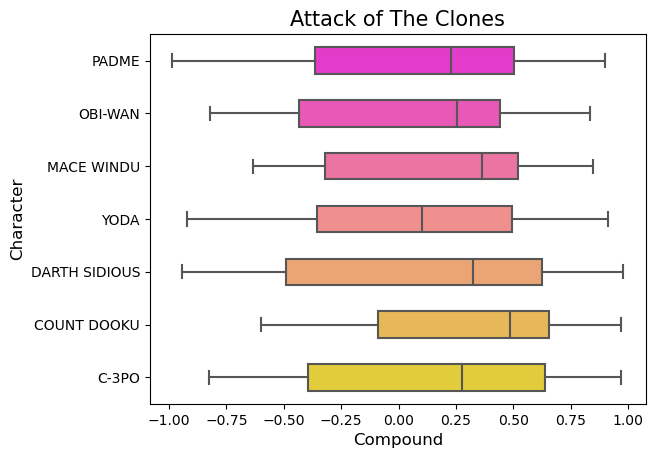

In [63]:
sns.boxplot(x='compound', y='character', order=["PADME", "OBI-WAN", "MACE WINDU", "YODA", "DARTH SIDIOUS", "COUNT DOOKU", "C-3PO"], palette="spring", width= 0.5, data=epII)

plt.xlabel("Compound", fontsize= 12)
plt.ylabel("Character", fontsize= 12)
plt.title("Attack of The Clones", fontsize= 15)

Text(0.5, 1.0, 'Revenge of the Sith')

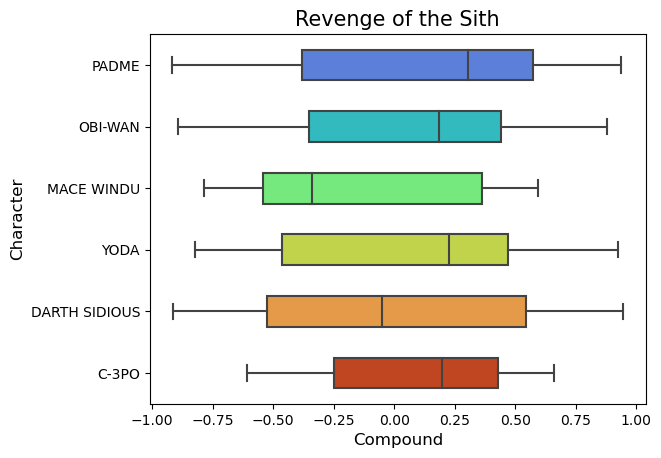

In [64]:
sns.boxplot(x='compound', y='character', order=["PADME", "OBI-WAN", "MACE WINDU", "YODA", "DARTH SIDIOUS", "C-3PO"], palette="turbo", width= 0.5, data=epIII)

plt.xlabel("Compound", fontsize= 12)
plt.ylabel("Character", fontsize= 12)
plt.title("Revenge of the Sith", fontsize= 15)


Text(0.5, 1.0, 'A New Hope')

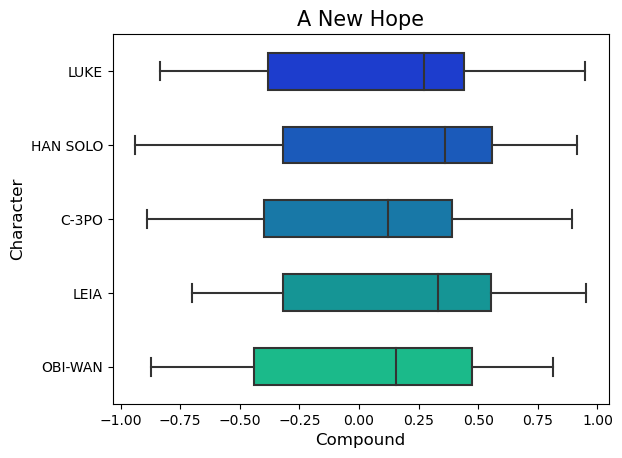

In [65]:
sns.boxplot(x='compound', y='character', order=["LUKE", "HAN SOLO", "C-3PO", "LEIA", "OBI-WAN"],palette="winter", width= 0.5, data=epIV)

plt.xlabel("Compound", fontsize= 12)
plt.ylabel("Character", fontsize= 12)
plt.title("A New Hope", fontsize= 15)

Text(0.5, 1.0, 'The Empire Strikes Back')

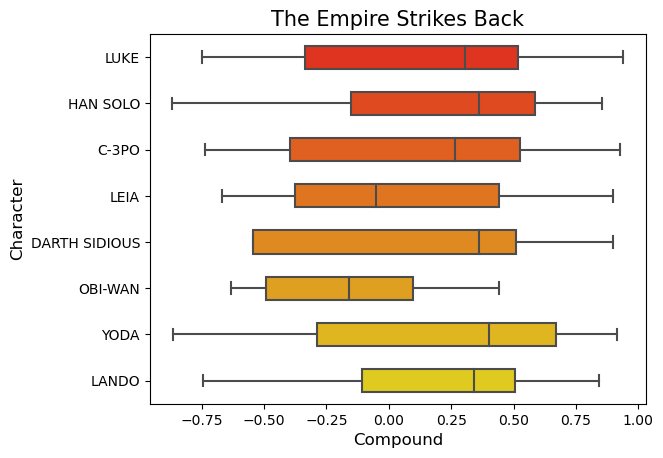

In [66]:
sns.boxplot(x='compound', y='character', order=["LUKE", "HAN SOLO", "C-3PO", "LEIA", "DARTH SIDIOUS", "OBI-WAN", "YODA", "LANDO"], palette="autumn", width= 0.5, data=epV)

plt.xlabel("Compound", fontsize= 12)
plt.ylabel("Character", fontsize= 12)
plt.title("The Empire Strikes Back", fontsize= 15)

Text(0.5, 1.0, 'Return of the Jedi')

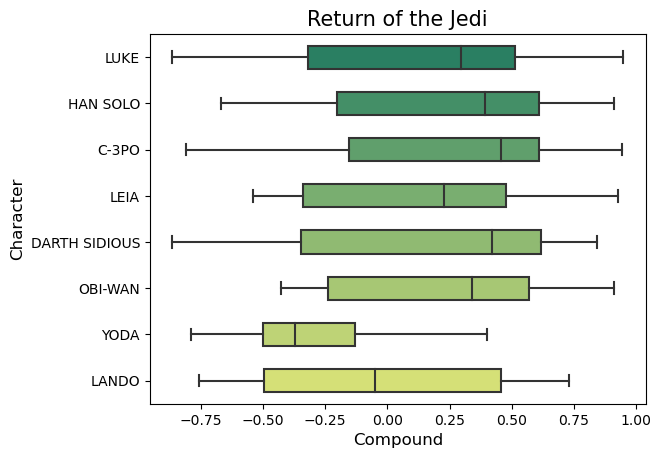

In [67]:
sns.boxplot(x='compound', y='character', order=["LUKE", "HAN SOLO", "C-3PO", "LEIA", "DARTH SIDIOUS", "OBI-WAN", "YODA", "LANDO"], palette="summer", width= 0.5, data=epVI)

plt.xlabel("Compound", fontsize= 12)
plt.ylabel("Character", fontsize= 12)
plt.title("Return of the Jedi", fontsize= 15)

<p>Boxplot is a type of plot that shows summary properties of a set of numeric values such as minimum, first quartile, median, third quartile, and maximum. Let's analyze the graphs plotted without the presence of neutral compound values.</p>

##### Attack of the Clones

<p>Episode Summary: Padmé suffers an assassination attempt early in the film, and Obi-Wan and Anakin Skywalker are assigned to protect her. While escorting her back to Naboo, Anakin falls in love with Padmé, and at the end of the episode, the two get married (which was not allowed because he was a Jedi apprentice). At that moment, Anakin had not yet assumed the identity of Darth Vader, but the dark side was already manifesting itself in the character's words and attitudes, as in the moment he takes revenge for the death of his mother, who was kidnapped by the Tusken people in Tattooine. , and in the attitudes of insubordination with his master Obi-Wan.</p>
<p>The graph shows that, with the exception of Master Yoda's dialogues, which had a relatively equal distribution, the compound value of the main characters in Attack of the Clones are more concentrated in the first percentile, which corresponds to the negative compound values. This situation is very evident in the boxplot referring to Darth Sidious - a villain naturally has his lines more focused on a negative polarity.</p>

##### Revenge of the Sith

<p>In Episode III, Anakin has dreams in which Padmé appears dead after discovering that she is pregnant, and fears for her life. The Jedi Council refuses to ordain Anakin as a Jedi despite accepting him on the council, which annoys him, but assigns him to spy on Senator Palpatine, who gained power over the Jedi Order after the battle of the clones. The senator introduces himself as Darth Sidious to Anakin and convinces him that only the dark side of the Force has the power to save Padmé. Mace Windu clashes with Palpatine, but has his hand cut off by Anakin, an attitude that contributes to the character's definitive fall to the dark side. After killing everyone in the Jedi Temple and being confronted by his now former master Obi-Wan, the now Darth Vader nearly dies on Mustafar and is rescued by Sidious. Padmé, after giving birth to the twins Luke and Leia, dies from the grief of witnessing Anakin's change. The twins are separated at the direction of the remaining Jedi, to avoid being tracked by their father.</p>
<p>In this graph, it is possible to notice a change in the tone of the dialogues of the character Darth Sidious: having control of the Galactic Senate and the Jedi Order, and the attempts to convert Anakin to the dark side, may have contributed to the change in polarity of the dialogues that, although positive, they are still dialogues of a villain in the story. The polarity of Mace Windu's dialogues changed significantly from the previous episode to the III episode. Master Yoda also had an important change in the first percentile, which corresponds to the lines that have a more negative polarity.</p>

##### A New Hope

<p>In the fourth episode of the trilogy, the Empire reigns supreme in the Galaxy with Darth Vader as a high official, and the resistance to the empire has Princess Leia Organa as one of its leaders. After stealing the Death Star plans, Leia places them in the memory of the droid R2-D2, and sends him to Tattooine along with C-3PO. There, they are found by Luke Skywalker, who finds Leia's message to Obi-Wan. He believes that Obi-Wan is the hermit who lives in the Tattoine Mountains, known as Ben Kenobi, who saves Luke and C-3PO after they are captured by the Tusken people. Luke offers to help Obi-Wan rescue Leia after having her family murdered by Imperial Stormtroopers. In Mos Eisley they meet Han Solo and Chewbacca, who will be instrumental in helping to destroy the Death Star built by the Empire. Darth Vader kills his former master after a battle, while Luke, Han and Chewbacca receive Commendations from Leia for their assistance in destroying the Imperial weapon.</p>
<p>

### And what about Darth Vader?
<p>Let's create a histogram with the compound values of Darth Vader's dialogues overlaid. Let's create a histogram with the compound values of Darth Vader's dialogues overlaid. For this, the compound data of the character will be isolated in separate dataframes.<p>

In [68]:
#dataframes with only Anakin/Darth Vader compound values
dv_epII = epII[(epII['character']=='ANAKIN')]
dv_epIII = epIII[(epIII['character']=='ANAKIN/VADER')]
dv_epIV = epIV[(epIV['character']=='DARTH VADER')]
dv_epV= epV[(epV['character']=='DARTH VADER')]
dv_epVI = epVI[(epVI['character']=='ANAKIN')]

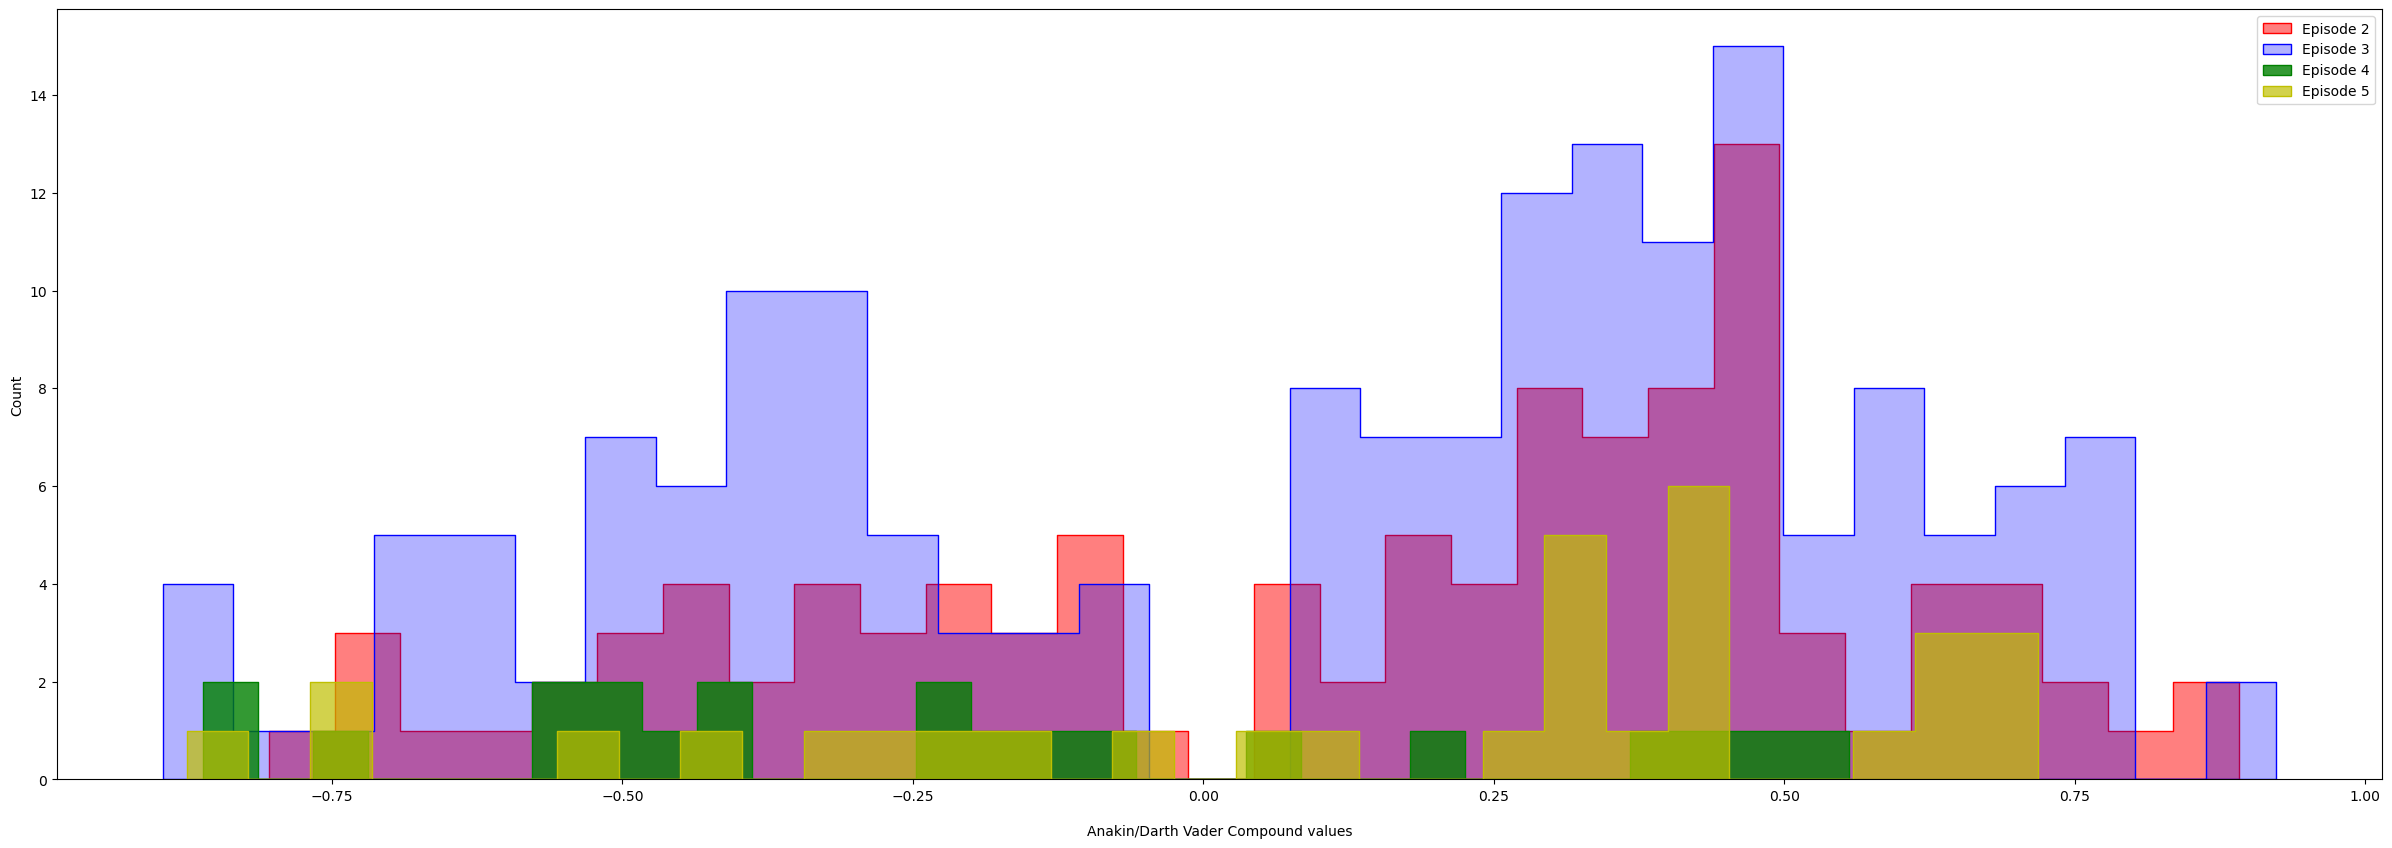

In [85]:
fig, ax = plt.subplots(figsize=[30,10])

sns.histplot(data=dv_epII, x='compound', label= "Episode 2", alpha=0.5, bins=30, color='r', element='step')
sns.histplot(data=dv_epIII, x='compound', label= "Episode 3", alpha=0.3, bins=30, color='b', element='step')
sns.histplot(data=dv_epIV, x='compound', label= "Episode 4", alpha=0.8, bins=30, color='g', element='step')
sns.histplot(data=dv_epV, x='compound', label= "Episode 5", alpha=0.7, bins=30, color='y', element='step')
sns.histplot(data=dv_epVI, x='compound', label= "Episode 6", alpha=0.3, bins=30, color='p', element='step')

plt.xlabel('Anakin/Darth Vader Compound values', fontsize=10, labelpad=15)
plt.legend()
plt.show()